$$
-1 = - \left( 1 - \frac{2M}{r}  \right) \dot{t}^2 + \left( 1 - \frac{2M}{r}  \right)^{-1} \dot{r}^2 + r^2 \dot{\phi}^2
$$

$$
\frac{E^2}{L^2} - \frac{1}{r^2} \left( 1 - \frac{2M}{r}  \right) - \frac{1}{L^2} \left( 1 - \frac{2M}{r}  \right) = \left( \frac{1}{r^2}\left( \frac{dr}{d\phi} \right) \right)^2
$$

In [ ]:
using QuadGK

In [ ]:
function orbit_phi(E, L, u)
    return 1 / sqrt(
        E^2 / L^2 - u^2 * (1 - 2 * u) - 1 / L^2 * (1 - 2 * u)
    )
end

In [ ]:
function prepare_plot(E, L, phi_ini=pi/6)
    diff = 1e-5
    r_list, phi_list, x_list, y_list = [], [], [], []
    for i in 0.001:diff:real(1/P(b))
        if i > 1/2
            continue
        end
        phi_val, err = quadgk(phi, 0, i)
        push!(r_list, 1/i)
        push!(phi_list, phi_val + phi_ini)
    end
    for (phi_val, r_val) in zip(phi_list, r_list)
        push!(x_list, r_val * cos(phi_val))
        push!(y_list, r_val * sin(phi_val) )
    end
    return x_list, y_list
end

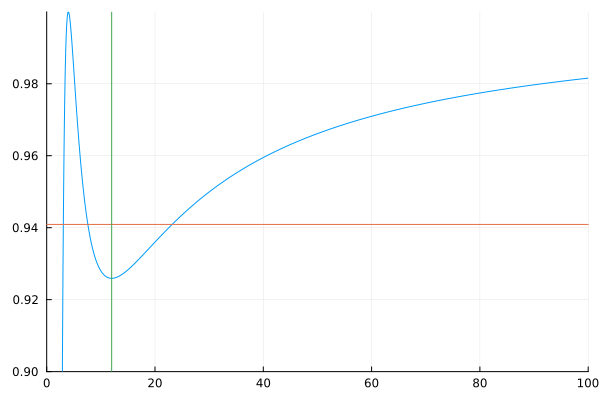

In [12]:

using Plots
E, L = 0.97, 4.0
x_list, y_list = [], []
for i in 2:0.01:100
    push!(x_list, i)
    push!(y_list, -2 * L^2 / i^3 + L^2 / i^2 - 2 / i + 1)
end

plt = plot(
    xlim=(0, 100), ylim=(0.90, 1),
    # framestyle=:none,
)

plot!(plt, x_list, y_list, legend=false)
plot!(plt, [0, 100], [E^2, E^2], legend=false)
plot!(plt, [12, 12], [0, 100], legend=false)

1.734723475976807e-18r = 15.0
phi = 0.0
dot_t = 1.1192307692307693
dot_r = 0.11226621799857547
dot_phi = 0.017777777777777778
r = 15.001123112074673
phi = 0.0001777644695935408
dot_t = 1.119221086220008
dot_r = 0.11235619438178489
dot_phi = 0.01777511588515747
r = 15.002247123836534
phi = 0.00035550231259040197
dot_t = 1.1192113968762691
dot_r = 0.11244615543454672
dot_phi = 0.017772452458712118
r = 15.003372035132235
phi = 0.0005332135136604376
dot_t = 1.1192017012039828
dot_r = 0.11253610114832087
dot_phi = 0.017769787500063135
r = 15.004497845808341
phi = 0.0007108980574897195
dot_t = 1.1191919992075796
dot_r = 0.11262603151457713
dot_phi = 0.017767121010832155
r = 15.00562455571134
phi = 0.0008885559287805418
dot_t = 1.119182290891492
dot_r = 0.11271594652479523
dot_phi = 0.017764452992641046
r = 15.006752164687622
phi = 0.001066187112251408
dot_t = 1.1191725762601534
dot_r = 0.11280584617046474
dot_phi = 0.0177617834471119
r = 15.007880672583525
phi = 0.0012437915926373083
dot_t =

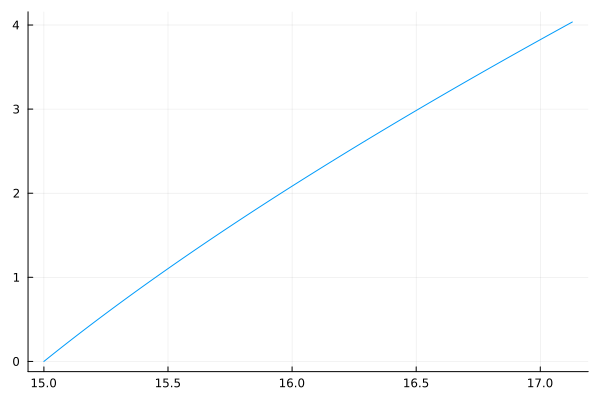

In [ ]:
using DifferentialEquations
using Plots

function f!(du, u)
    du[1] = u[4]
    du[2] = u[5]
    du[3] = - 2 / u[1]^2 * 1 / (1 - 2/u[1]) * u[3] * u[4]
    # du[4] = - 1 / u[1]^2 * (1 - 2/u[1]) * u[3]^2 + 1 / (u[1]^2 * (1 - 2/u[1])) * u[4]^2 + (1 - 2/u[1]) * u[1] * u[5]^2
    du[4] = sqrt( ( 1 - 2/u[1] ) * u[3]^2 - ( 1 - 2/u[1] ) * ( 1 + u[1]^2 * u[5]^2 ) )
    du[5] = - 2 / u[1] * u[4] * u[5]
end

r, E, L = 15.0, 0.97, 4.0

dot_t = E / ( 1 - 2/r )
dot_phi = L / r^2
dot_r = sqrt(E^2 + 2 * L^2 / r^3 - L^2 / r^2 + 2 / r - 1)

u0 = [r,  0.0, dot_t, dot_r, dot_phi] # r, phi, dot_t, dot_r, dot_phi
tspan = (0.0, 15)
dt = 0.01

p = Float64[]
prob = ODEProblem(f!, u0, tspan, p)
sol = solve(prob, Tsit5(), saveat=dt)

y_list = [ sol[i][1] * sin(sol[i][2]) for i in 1:length(sol) ]
x_list = [ sol[i][1] * cos(sol[i][2]) for i in 1:length(sol) ]

for i in 1:length(sol)
    println("r = ", sol[i][1])
    println("phi = ", sol[i][2])
    println("dot_t = ", sol[i][3])
    println("dot_r = ", sol[i][4])
    println("dot_phi = ", sol[i][5])
end

plot(x_list, y_list, legend=false)